In [77]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

import pandas as pd
import matplotlib.pyplot as plt
from Graph import *
from math import sqrt

## Test the Graph class

In [ ]:
vertex1 = Vertex(60, 2, 0)
vertex2 = Vertex(61, 3, 0)

edge = Edge([vertex1, vertex2])

print(edge.angle, edge.length, edge.intermediate_point())

In [ ]:
graph = Graph(warnings = True)

last_vertex = Vertex(-1, -1, 0, warnings = True)
graph.add_vertices(last_vertex)

for i in range(0,10):
    new_vertex = Vertex(i, i, 0, warnings = True)
    edge = Edge(vertices = [last_vertex, new_vertex], warnings = True)
    graph.add_vertices(new_vertex)
    last_vertex = new_vertex

In [ ]:
pp.pprint(graph.vertices)
pp.pprint(graph.edges)
    
for i in range(5):
    cur_vertex = next(iter(graph.vertices))
    cur_vertex.set_graph(None)

    pp.pprint(graph.vertices)
    pp.pprint(graph.edges)
    pp.pprint("")

In [39]:
print(calculate_angle(60, 61, 2, 3))
print(calculate_angle(60, 61, 3, 2))

346.10049260270813
13.89950739729187


## Angle graphifying

In [78]:
df = pd.read_csv("presets/0.csv")

In [120]:
tra = df["trajectory"].unique()[0]
dft = df[df["trajectory"] == tra]

In [ ]:
# Additional idea: combine edges with similar angles

### Testing division

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


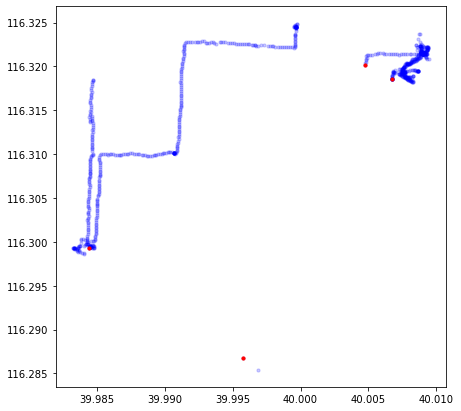

In [121]:
maximum = 0.0014
dft.loc[:, "latitude_change"] = dft["latitude"] - dft["latitude"].shift(1)
dft.loc[:, "longitude_change"] = dft["longitude"] - dft["longitude"].shift(1)

def pythago(lat, long):
    return sqrt(lat*lat + long*long)

dft.loc[:,["change"]] = dft.apply(lambda x: pythago(x.latitude_change, x.longitude_change), axis=1)

maximum = dft["change"].mean()*10
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(dft.latitude, dft.longitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.scatter(dft[dft["change"] > maximum].latitude, dft[dft["change"] > maximum].longitude, zorder=1, alpha=1, c='r', s=10)

print()

### The actual graph

In [122]:
# Only the most recent
max_angle_change = 45

graph = Graph()

latitude = dft.iloc[0, 0]
longitude = dft.iloc[0, 1]
altitude = dft.iloc[0, 2]

last_vertex = Vertex(latitude, longitude, altitude, graph)
last_latitude = dft.iloc[1, 0]
last_longitude = dft.iloc[1, 1]
last_altitude = dft.iloc[1, 2]

last_angle = last_vertex.angle_to_point(last_latitude, last_longitude)

for i in range(2,len(dft)):
    cur_latitude = dft.iloc[i, 0]
    cur_longitude = dft.iloc[i, 1]   
    cur_altitude = dft.iloc[i, 2]
    
    cur_angle = calculate_angle(last_latitude, cur_latitude, last_longitude, cur_longitude)
    
    if abs(last_angle-cur_angle) > max_angle_change:
        new_vertex = Vertex(last_latitude, last_longitude, last_altitude, graph)
        Edge([last_vertex, new_vertex])
        
        last_angle = cur_angle
        last_vertex = new_vertex
    
    last_latitude = cur_latitude
    last_longitude = cur_longitude
    last_altitude = cur_altitude
    
new_vertex = Vertex(last_latitude, last_longitude, last_altitude, graph)
Edge([last_vertex, new_vertex])

print(graph.vertices)
print(graph.edges)

{<Vertex: 40.007663,116.319417,40>, <Vertex: 40.007669,116.319414,40>, <Vertex: 40.007654,116.319266,40>, <Vertex: 40.007699,116.319151,40>, <Vertex: 40.007272,116.319756,39>, <Vertex: 40.007428,116.319432,40>, <Vertex: 40.007395,116.319354,38>, <Vertex: 40.007447,116.319379,37>, <Vertex: 40.007575,116.319238,34>, <Vertex: 40.007288,116.319088,38>, <Vertex: 40.007288,116.319088,38>, <Vertex: 40.007284,116.319084,41>, <Vertex: 40.007298,116.319036,42>, <Vertex: 40.008215,116.318248,37>, <Vertex: 40.008015,116.318471,36>, <Vertex: 40.008289,116.318251,32>, <Vertex: 40.008305,116.318267,31>, <Vertex: 40.007867,116.318699,23>, <Vertex: 40.007717,116.318842,22>, <Vertex: 40.007726,116.318826,20>, <Vertex: 40.007721,116.318792,19>, <Vertex: 40.008019,116.318455,20>, <Vertex: 40.006977,116.319607,41>, <Vertex: 40.007966,116.31854,43>, <Vertex: 40.007399,116.31912,40>, <Vertex: 40.007411,116.319124,34>, <Vertex: 40.007496,116.319085,21>, <Vertex: 40.007619,116.319094,18>, <Vertex: 40.007905,11

reduced from 907 to 294 points


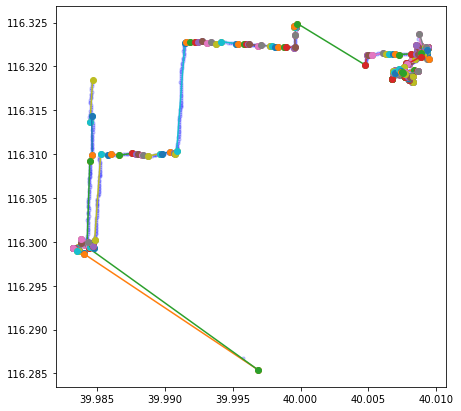

In [123]:
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(dft.latitude, dft.longitude, zorder=1, alpha= 0.2, c='b', s=10)

for edge in graph.edges:
    lat1 = min(edge.vertices).latitude
    long1 = min(edge.vertices).longitude
    
    lat2 = max(edge.vertices).latitude
    long2 = max(edge.vertices).longitude
    
    plt.plot([lat1, lat2], [long1, long2], marker = 'o')
    

print(f"reduced from {len(dft)} to {len(graph.vertices)} points")

In [124]:
# Angle since the start
max_angle_change = 15

graph = Graph()

latitude = dft.iloc[0, 0]
longitude = dft.iloc[0, 1]
altitude = dft.iloc[0, 2]

last_vertex = Vertex(start_latitude, start_longitude, altitude, graph)
last_latitude = dft.iloc[1, 0]
last_longitude = dft.iloc[1, 1]
last_altitude = dft.iloc[1, 2]

last_angle = last_vertex.angle_to_point(last_latitude, last_longitude)

for i in range(2,len(dft)):
    cur_latitude = dft.iloc[i, 0]
    cur_longitude = dft.iloc[i, 1]   
    cur_altitude = dft.iloc[i, 2]
    
    cur_angle = calculate_angle(start_latitude, cur_latitude, start_longitude, cur_longitude)
        
    if abs(last_angle-cur_angle) > max_angle_change:
        new_vertex = Vertex(last_latitude, last_longitude, last_altitude, graph)
        Edge([last_vertex, new_vertex])
        
        last_angle = cur_angle
        last_vertex = new_vertex
        
        start_altitude = last_altitude
        start_longitude = last_longitude
    
    last_latitude = cur_latitude
    last_longitude = cur_longitude
    last_altitude = cur_altitude
    
new_vertex = Vertex(last_latitude, last_longitude, last_altitude, graph)
Edge([last_vertex, new_vertex])

print(graph.vertices)
print(graph.edges)

{<Vertex: 39.991169,116.31848,30>, <Vertex: 39.991389,116.321583,16>, <Vertex: 39.991368,116.321736,16>, <Vertex: 39.999769,116.324886,53>, <Vertex: 40.009328,116.320887,25>, <Vertex: 39.984683,116.324886,150>, <Vertex: 39.984019,116.298663,64>, <Vertex: 39.995777,116.286798,218>, <Vertex: 39.996832,116.285446,84>, <Vertex: 39.988397,116.309931,46>, <Vertex: 39.988553,116.309866,42>, <Vertex: 39.989173,116.309866,42>, <Vertex: 39.991058,116.312473,25>, <Vertex: 39.991132,116.318231,29>}
{<Edge: (<Vertex: 39.984019,116.298663,64>) -> (<Vertex: 39.984683,116.324886,150>)>, <Edge: (<Vertex: 39.995777,116.286798,218>) -> (<Vertex: 39.984019,116.298663,64>)>, <Edge: (<Vertex: 39.996832,116.285446,84>) -> (<Vertex: 39.995777,116.286798,218>)>, <Edge: (<Vertex: 39.996832,116.285446,84>) -> (<Vertex: 39.988397,116.309931,46>)>, <Edge: (<Vertex: 39.988397,116.309931,46>) -> (<Vertex: 39.988553,116.309866,42>)>, <Edge: (<Vertex: 39.988553,116.309866,42>) -> (<Vertex: 39.989173,116.309866,42>)>, 

reduced from 907 to 14 points


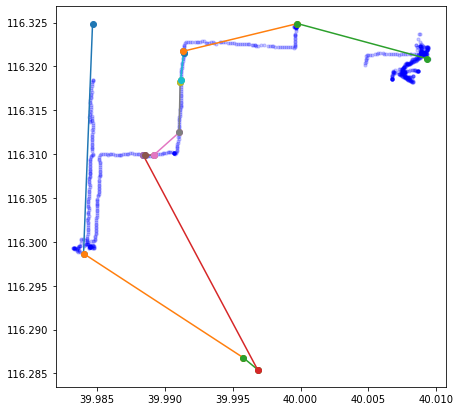

In [125]:
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(dft.latitude, dft.longitude, zorder=1, alpha= 0.2, c='b', s=10)

for edge in graph.edges:
    lat1 = min(edge.vertices).latitude
    long1 = min(edge.vertices).longitude
    
    lat2 = max(edge.vertices).latitude
    long2 = max(edge.vertices).longitude
    
    plt.plot([lat1, lat2], [long1, long2], marker = 'o')
    

print(f"reduced from {len(dft)} to {len(graph.vertices)} points")

In [ ]:
# change gaps into different trajectory
# add distance to angle calculation

In [147]:
# Angle since start plus distance
max_angle_change = 45
max_angle_change_min = 2
mean_distance_change = dft["change"].mean()

graph = Graph()

latitude = dft.iloc[0, 0]
longitude = dft.iloc[0, 1]
altitude = dft.iloc[0, 2]

last_vertex = Vertex(start_latitude, start_longitude, altitude, graph)
last_latitude = dft.iloc[1, 0]
last_longitude = dft.iloc[1, 1]
last_altitude = dft.iloc[1, 2]

last_angle = last_vertex.angle_to_point(last_latitude, last_longitude)

for i in range(2,len(dft)):
    cur_latitude = dft.iloc[i, 0]
    cur_longitude = dft.iloc[i, 1]   
    cur_altitude = dft.iloc[i, 2]
    
    cur_angle = calculate_angle(start_latitude, cur_latitude, start_longitude, cur_longitude)
    cur_distance = sqrt(pow(start_latitude-cur_latitude, 2) + pow(start_longitude-cur_longitude,2))
    
    compare_angle = max(max_angle_change*mean_distance_change/cur_distance, max_angle_change_min)
        
    if abs(last_angle-cur_angle) > compare_angle:
        new_vertex = Vertex(last_latitude, last_longitude, last_altitude, graph)
        Edge([last_vertex, new_vertex])
        
        last_angle = cur_angle
        last_vertex = new_vertex
        
        start_altitude = last_altitude
        start_longitude = last_longitude
    
    last_latitude = cur_latitude
    last_longitude = cur_longitude
    last_altitude = cur_altitude
    
new_vertex = Vertex(last_latitude, last_longitude, last_altitude, graph)
Edge([last_vertex, new_vertex])

print(graph.vertices)
print(graph.edges)

{<Vertex: 40.007761,116.320093,41>, <Vertex: 40.007661,116.319986,41>, <Vertex: 40.007718,116.318705,41>, <Vertex: 40.007808,116.318623,40>, <Vertex: 40.008071,116.318568,28>, <Vertex: 40.007803,116.318672,18>, <Vertex: 40.008019,116.318455,20>, <Vertex: 40.008182,116.320646,45>, <Vertex: 40.008226,116.320738,41>, <Vertex: 40.008873,116.322144,26>, <Vertex: 40.008874,116.322234,24>, <Vertex: 40.008842,116.322298,27>, <Vertex: 40.008889,116.322551,78>, <Vertex: 40.008962,116.322462,81>, <Vertex: 40.009243,116.32105,26>, <Vertex: 40.009269,116.320978,26>, <Vertex: 40.009328,116.320887,25>, <Vertex: 39.984683,116.322251,150>, <Vertex: 39.984608,116.317761,150>, <Vertex: 39.984563,116.317517,151>, <Vertex: 39.984568,116.316911,155>, <Vertex: 39.984501,116.314907,171>, <Vertex: 39.984532,116.314808,172>, <Vertex: 39.984427,116.31424,176>, <Vertex: 39.984501,116.313659,181>, <Vertex: 39.984618,116.314323,34>, <Vertex: 39.984649,116.314107,36>, <Vertex: 39.984655,116.313724,38>, <Vertex: 39.9

reduced from 907 to 164 points


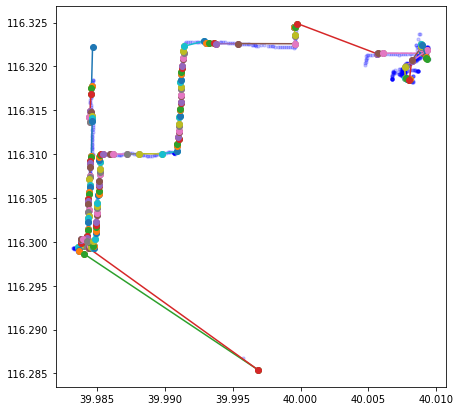

In [148]:
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(dft.latitude, dft.longitude, zorder=1, alpha= 0.2, c='b', s=10)

for edge in graph.edges:
    lat1 = min(edge.vertices).latitude
    long1 = min(edge.vertices).longitude
    
    lat2 = max(edge.vertices).latitude
    long2 = max(edge.vertices).longitude
    
    plt.plot([lat1, lat2], [long1, long2], marker = 'o')
    

print(f"reduced from {len(dft)} to {len(graph.vertices)} points")